  Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check files in MyDrive

In [ ]:
!ls /content/drive/MyDrive/

'AWS_UC Davis Mail - Pearson VUE Confirmation of Payment.pdf'
'Candidacy Form_Parina'
'ChangeBridge_24th Oct_Recording.mp4'
'Changebridge LLC_13Oct.mp4'
'Colab Notebooks'
'Copy of Organic Abstract - Business Basic Template by Slidesgo.gslides'
'Data Visualization Project'
'Data Viz- Team Assignment 2.gdoc'
'DDR_Final Report.gdoc'
'F ChangeBridge Practicum'
'Feedback form.gform'
 GMT20221103-200602_Recording_3840x2160.mp4
'Group A- TABLE READ for BAX462 Teamwork Class.gdoc'
'Hackathon - Z by HP.gslides'
'LinkedIn Posts Blogs.gform'
'LinkedIn Profile.gform'
 LinkedIn_Tips_MSBA.mp4
'Mentorship Program UC Davis MSBA 2022-23.gform'
 Notability
'Notability (1)'
'Notability (2)'
 Notes_MSBA
 Parina_Analytics.pdf
 Parina_Intro.pptx
 Parina_Kolhe.pdf
 PARINA_Product_CustomerSuccess.pdf
'Questions for Jennifer Liu.gform'
'Questions for Jennifer Liu (Responses).gsheet'
 SaaS-Sales.csv
'Tesla_FINAL_PARINA_Growth PM.pdf'
 Test_6thJan.gdoc
 video1670196802.mp4


Load the Data

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/SaaS-Sales.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [ ]:
data.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


Data Cleaning and Preparation:

Handle missing values

In [ ]:
data.dropna(inplace=True)  # Remove rows with missing values

Convert data types

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')  # Assuming the date format is MM/DD/YYYY

Unique values

In [ ]:
# List of categorical columns to check
categorical_columns = ['Country', 'Region', 'City', 'Product', 'Industry', 'Customer', 'Segment']

# Count unique values in each categorical column
unique_counts = {col: data[col].nunique() for col in categorical_columns}

# Display the results
for col, count in unique_counts.items():
    print(f"Number of unique values in {col}: {count}")

Number of unique values in Country: 48
Number of unique values in Region: 3
Number of unique values in City: 262
Number of unique values in Product: 14
Number of unique values in Industry: 10
Number of unique values in Customer: 99
Number of unique values in Segment: 3


Analyzing Categorical Variables

In [ ]:
# List all categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [ ]:
# Frequency distribution of categorical variables
for col in categorical_cols:
    print(f"Value Counts for {col}:\n", data[col].value_counts())
    print("\n")

Value Counts for Order ID:
 Order ID
EMEA-2023-100111    14
EMEA-2023-157987    12
AMER-2022-165330    11
EMEA-2022-108504    11
EMEA-2021-131338    10
                    ..
EMEA-2022-157259     1
AMER-2023-107986     1
EMEA-2021-112508     1
APJ-2022-126844      1
AMER-2023-119914     1
Name: count, Length: 5009, dtype: int64


Value Counts for Contact Name:
 Contact Name
Leonard Kelly       37
Gordon Parr         34
Amelia Campbell     34
Tracey Dickens      34
Evan Ince           32
                    ..
Joshua Gibson        1
Brian Campbell       1
Alexander Duncan     1
Frank Ferguson       1
Sam Randall          1
Name: count, Length: 793, dtype: int64


Value Counts for Country:
 Country
United States           2001
United Kingdom          1141
Japan                    985
France                   587
Canada                   506
Australia                492
Mexico                   469
Germany                  383
Brazil                   255
Sweden                   249
Chil

Analyzing Numerical Variables

Correlation Matrix:
                Row ID  Date Key  Customer ID     Sales  Quantity  Discount  \
Row ID       1.000000  0.014658     0.029609 -0.001359 -0.004016  0.013480   
Date Key     0.014658  1.000000     0.004108 -0.009799 -0.005097 -0.002767   
Customer ID  0.029609  0.004108     1.000000  0.003729 -0.006892  0.003068   
Sales       -0.001359 -0.009799     0.003729  1.000000  0.200795 -0.028190   
Quantity    -0.004016 -0.005097    -0.006892  0.200795  1.000000  0.008623   
Discount     0.013480 -0.002767     0.003068 -0.028190  0.008623  1.000000   
Profit       0.012497  0.004609     0.006864  0.479064  0.066253 -0.219487   

               Profit  
Row ID       0.012497  
Date Key     0.004609  
Customer ID  0.006864  
Sales        0.479064  
Quantity     0.066253  
Discount    -0.219487  
Profit       1.000000  


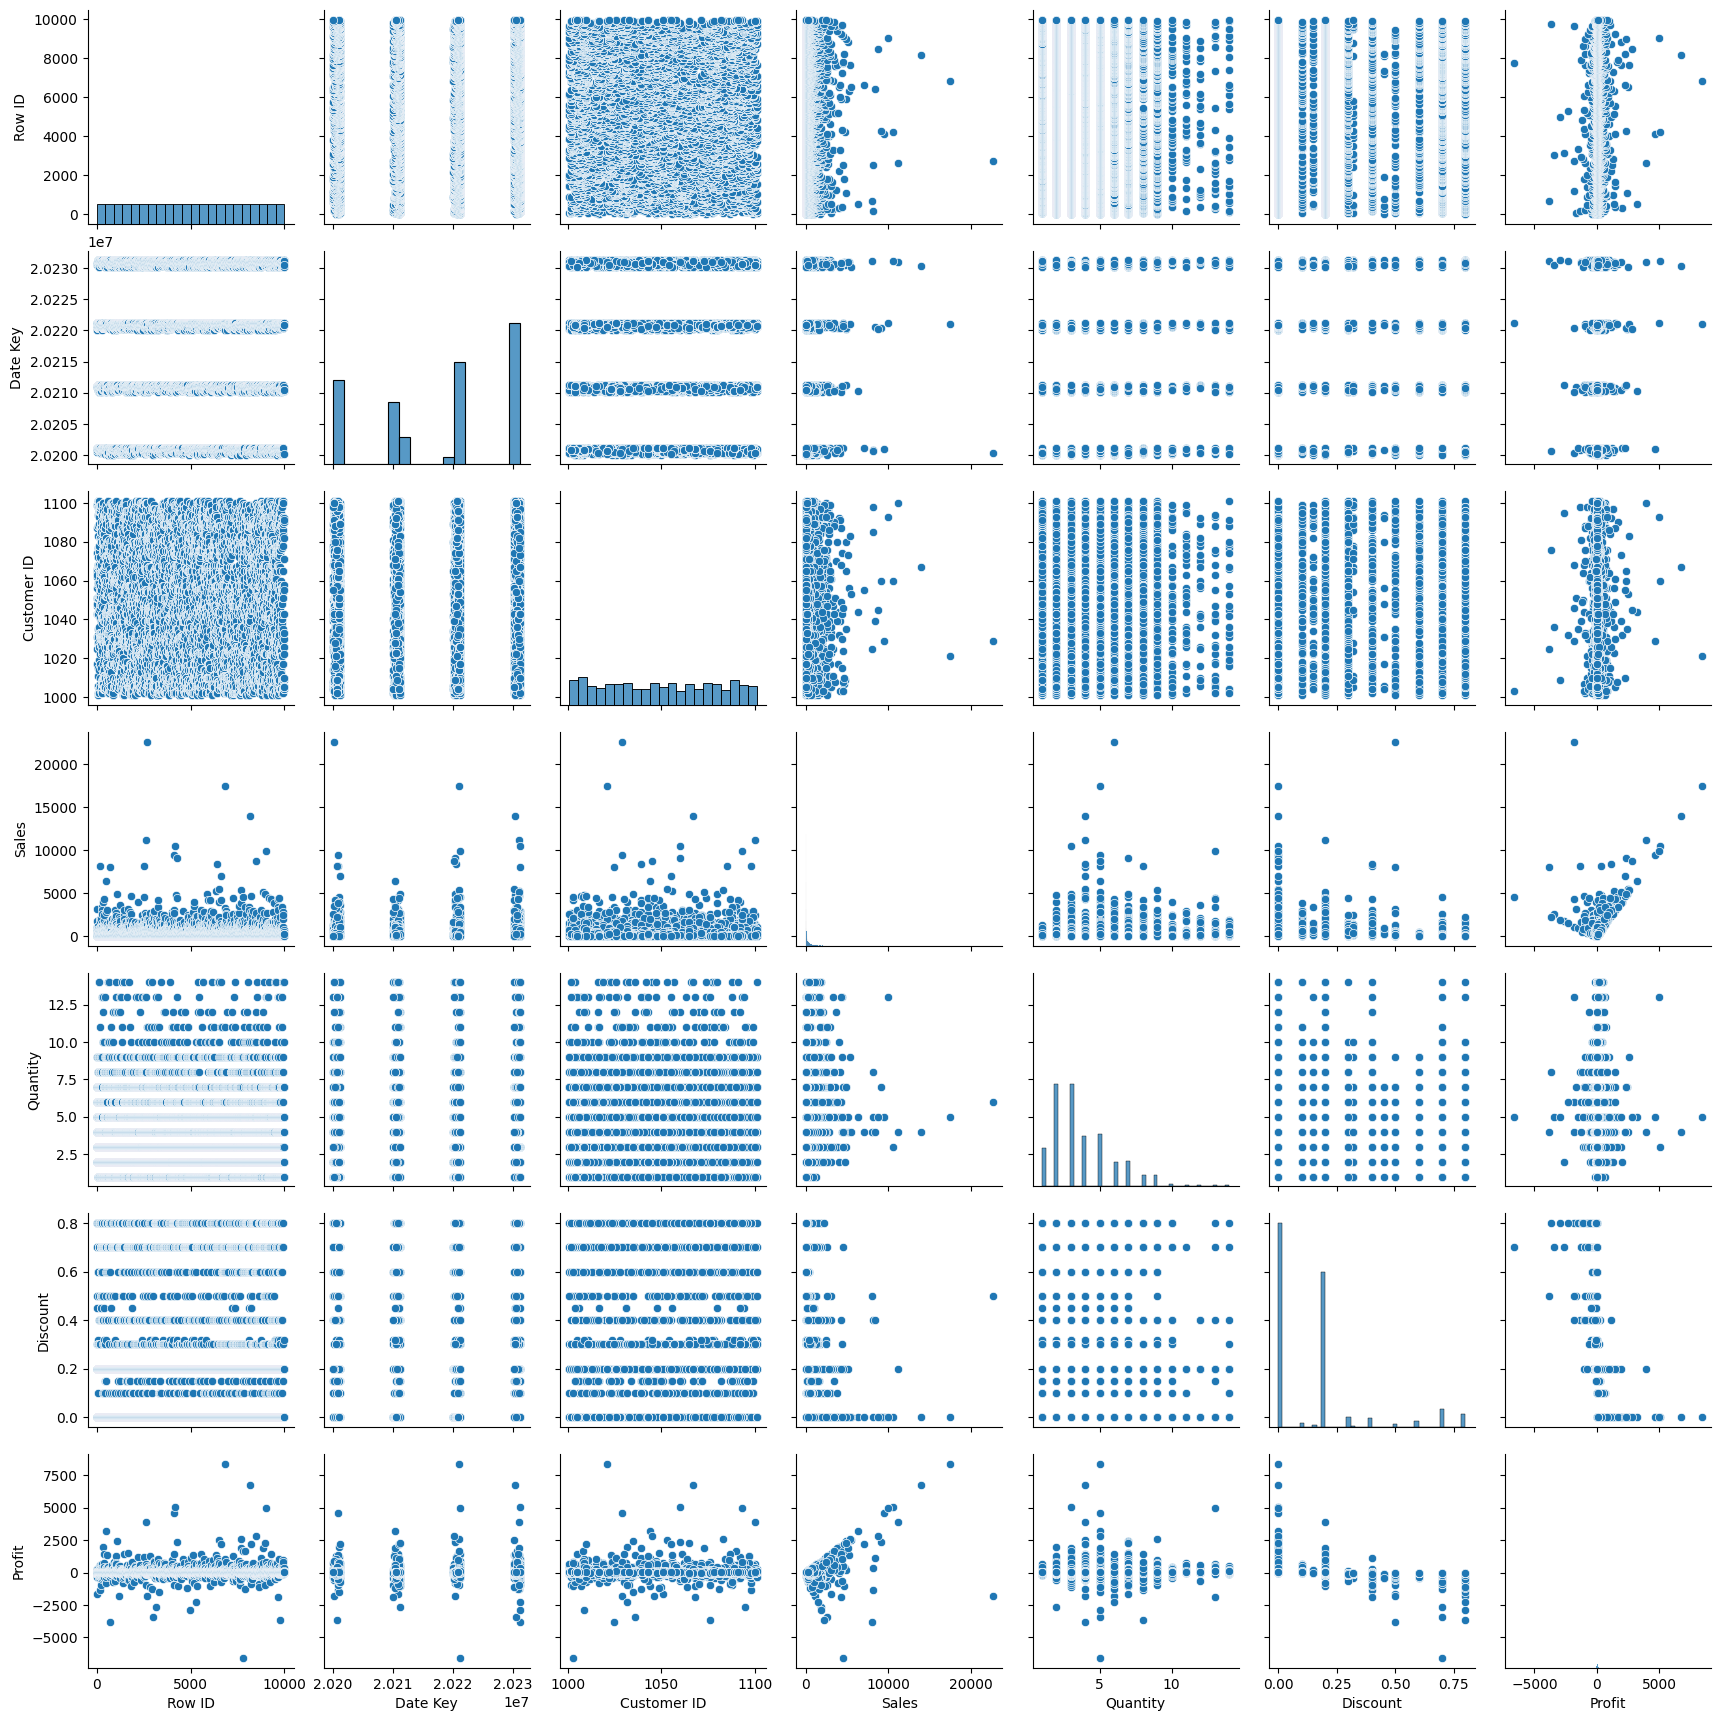

In [ ]:
# Extract numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Pairplot to visualize relationships
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(numeric_data)
plt.show()

Distribution of Sales

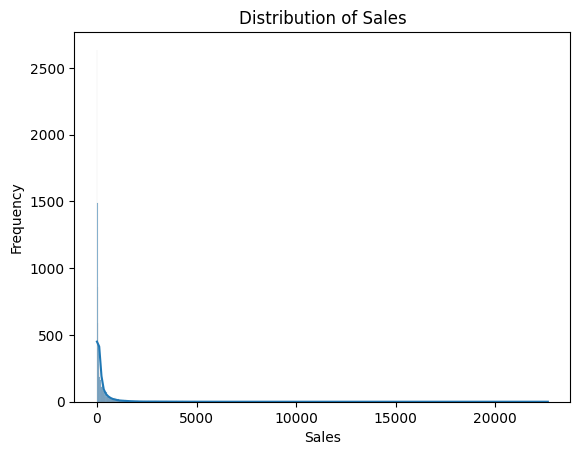

In [ ]:
sns.histplot(data['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Calculation of CLV for customers

Calculate CLV: Use the formula for CLV based on the aggregated data.
Here's a step-by-step approach using your sample data:

1. Aggregate Revenue and Costs
We will calculate the total revenue, total cost, and total profit for each customer.

2. Calculate CLV
A common formula for CLV is:
CLV
=
Total Revenue
−
Total Cost
CLV=Total Revenue−Total Cost

If you have data over 4 years, you might also consider average revenue per customer or other metrics, but we'll use the basic formula here for simplicity.

In [ ]:
# Aggregate revenue, cost, and profit for each customer
customer_clv = data.groupby('Customer').agg(
    Total_Revenue=pd.NamedAgg(column='Sales', aggfunc='sum'),
    Total_Cost=pd.NamedAgg(column='Discount', aggfunc='sum'),  # Assuming discount as cost for simplicity
    Total_Profit=pd.NamedAgg(column='Profit', aggfunc='sum')
).reset_index()

# Calculate CLV
customer_clv['CLV'] = customer_clv['Total_Revenue'] - customer_clv['Total_Cost']

# Display results
print(customer_clv)

               Customer  Total_Revenue  Total_Cost  Total_Profit         CLV
0                  AT&T     29462.3240       22.05     4520.6641  29440.2740
1   Abbott Laboratories     12617.1140        8.70     2281.7391  12608.4140
2                 Aetna     27278.5930       24.90     3312.6698  27253.6930
3                Airbus     29798.5930       13.70     5593.3657  29784.8930
4               Allianz     42904.1670       27.35     5531.8834  42876.8170
..                  ...            ...         ...           ...         ...
94           Volkswagen     35200.4240       19.60     4546.1910  35180.8240
95            Walgreens     14420.6190       10.20     -740.6747  14410.4190
96              Walmart     21508.1790       20.65     3111.1277  21487.5290
97          Walt Disney     29483.0050       17.20     5786.8297  29465.8050
98          Wells Fargo     23180.5442       16.99     2341.1471  23163.5542

[99 rows x 5 columns]


For business scenario, let's calculate retention rate
We will consider monthly period to check retention rate

In [ ]:
# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract year and month to create cohorts
data['YearMonth'] = data['Order Date'].dt.to_period('M')

In [ ]:
# Determine the first purchase month for each customer
cohort_data = data.groupby('Customer')['YearMonth'].min().reset_index()
cohort_data.columns = ['Customer', 'CohortMonth']

In [ ]:
# Merge to include cohort information in the main dataset
data = data.merge(cohort_data, on='Customer')

In [ ]:

# Create a pivot table to get the number of unique customers by cohort and month
pivot_table = pd.pivot_table(data, values='Customer', index='CohortMonth', columns='YearMonth', aggfunc='nunique', fill_value=0)


In [ ]:
# Calculate retention rates
# Retention rate for each cohort month relative to the first month
retention_rates = pivot_table.divide(pivot_table.iloc[:, 0], axis=0) * 100

# Display results
print("Pivot Table (Number of Active Customers):\n", pivot_table)
print("\nRetention Rates (%):\n", retention_rates)

Pivot Table (Number of Active Customers):
 YearMonth    2020-01  2020-02  2020-03  2020-04  2020-05  2020-06  2020-07  \
CohortMonth                                                                  
2020-01           27        9       11       11       14       19       16   
2020-02            0       18        7        8        8        6        7   
2020-03            0        0       26       14       11       15       15   
2020-04            0        0        0       11        7        8        2   
2020-05            0        0        0        0        6        0        1   
2020-06            0        0        0        0        0        5        1   
2020-07            0        0        0        0        0        0        2   
2020-08            0        0        0        0        0        0        0   
2020-09            0        0        0        0        0        0        0   

YearMonth    2020-08  2020-09  2020-10  ...  2023-03  2023-04  2023-05  \
CohortMonth             

TypeError: float() argument must be a string or a real number, not 'Period'

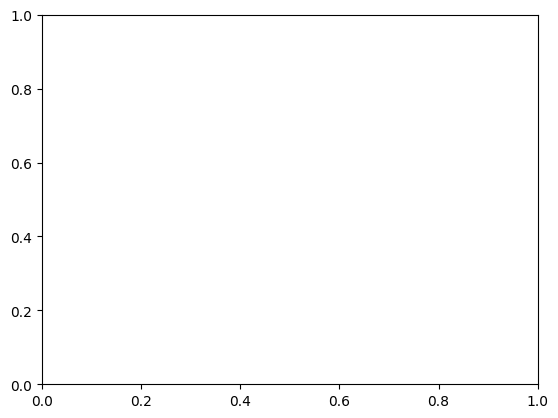

In [ ]:
import matplotlib.pyplot as plt

# Plotting retention rates for a specific cohort
cohort = '2020-01'
plt.plot(retention_rates.loc[cohort], marker='o')
plt.title(f'Retention Rates for Cohort {cohort}')
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Create necessary columns

In [ ]:
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

Calculate Customer Cohorts

In [ ]:
def calculate_customer_cohort(df):
    df['Customer Cohort'] = df.groupby('Customer ID')['Order Month'].transform('min')
    return df

data = calculate_customer_cohort(data)

Calculate Customer Segments

In [ ]:
def calculate_customer_segments(df):
    df['Customer Segment'] = np.where(
        df['Order Month'] == df['Customer Cohort'],
        'New Customer',
        np.where(
            df['Order Month'] > df['Customer Cohort'],
            'Returning Customer',
            'Lost Customer'
        )
    )
    return df

data = calculate_customer_segments(data)

Aggregate Data by Customer Segment and Time Period

In [ ]:
aggregated_data = data.groupby(['Customer Segment', 'Order Year', 'Order Month']).size().reset_index(name='Customer Count')

Visualize Customer Retention

In [ ]:
# Create a pivot table for easier plotting
pivot_table = aggregated_data.pivot_table(index=['Order Year', 'Order Month'], columns='Customer Segment', values='Customer Count', fill_value=0)

# Plot the data
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Customer Retention by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Customer Count')
plt.legend()
plt.show()

Filtering by Product

In [ ]:
# Assuming you have a 'Product' column in your DataFrame
product_to_filter = 'Marketing Suite'  # Replace with your desired product

filtered_data = data[data['Product'] == product_to_filter]

# Calculate customer retention metrics for the filtered data
# Assuming you've already filtered the data based on your desired criteria

# Calculate New Customers
new_customers_filtered = filtered_data[filtered_data['Customer Segment'] == 'New Customer'].shape[0]

# Calculate Returning Customers
returning_customers_filtered = filtered_data[filtered_data['Customer Segment'] == 'Returning Customer'].shape[0]

# Calculate Lost Customers
lost_customers_filtered = filtered_data[filtered_data['Customer Segment'] == 'Lost Customer'].shape[0]

# Print or use the calculated metrics for further analysis
print("New Customers:", new_customers_filtered)
print("Returning Customers:", returning_customers_filtered)
print("Lost Customers:", lost_customers_filtered)

In [ ]:
import seaborn as sns

# Assuming you have a DataFrame named 'data' with columns 'Customer ID', 'Order Date'
data['Cohort'] = data['Order Date'].dt.month

# Create a 'Cohort Index' column to represent the number of months since the first purchase
data['Cohort Index'] = data['Order Date'].dt.to_period('M') - data['Cohort']

# Pivot the data to create a cohort analysis table
pivot_table = data.pivot_table(index='Cohort Index', columns='Cohort', values='Customer ID', aggfunc='nunique')

# Create a heatmap to visualize the cohort analysis
sns.set(rc={'figure.figsize':(11, 7)})
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Customer Retention Cohort Analysis')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort')
plt.show()

In [ ]:
# Create product-specific cohorts (assuming Order Date is datetime)
data['Cohort'] = data.groupby(['Customer ID', 'Product'])['Order Date'].transform('min').dt.to_period('M')

# Create separate year-month index for efficient selection
cohort_year_month = data['Cohort'].dt.to_timestamp().dt.strftime('%Y-%m')
data.set_index(cohort_year_month, inplace=True)

# Pivot the data to create a cohort analysis table by product
pivot_table_by_product = data.pivot_table(index='Cohort Index', columns=['Cohort', 'Product'], values='Customer ID', aggfunc='nunique')

# Create a heatmap for each product
for product in pivot_table_by_product.columns.get_level_values(1).unique():
    sns.heatmap(pivot_table_by_product[('Customer ID', product)], annot=True, fmt='.0f')
    plt.title(f'Customer Retention Cohort Analysis for Product: {product}')
    plt.show()